# 传染病模型

- 本节主要内容为python对经典传染病模型进行实现，因传 染病模型研究属于传染病动力学研究方向，所以这里只是 将模型中微分方程进行了python实现。
- 本节涉及传染病模型包括：SI、SIS、SIR、SIRS、SEIR、 SEIRS共六个模型。

## SI Model

In [87]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [88]:
N = 10000  # N为人群总数
beta = 0.25  # β为传染率系数
gamma = 0  # gamma为恢复率系数
I_0 = 1  # I_0为感染者的初始人数
S_0 = N - I_0  # S_0为易感染者的初始人数
T = 150  # T为传播时间
INI = (S_0, I_0)  # INI为初始状态下的数组

In [89]:
def funcSI(inivalue, _):
    Y = np.zeros(2)
    X = inivalue
    Y[0] = -(beta * X[0] * X[1]) / N + gamma * X[1]  #易感个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]  #感染个体变化
    return Y

In [90]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率


# odeint()函数是scipy库中一个数值求解微分方程的函数
# odeint()函数需要至少三个变量，第一个是微分方程函数，第二个是微分方程初值，第三个是微分的自变量。

def plot():
    T_range = np.arange(0, T + 1)
    RES = spi.odeint(funcSI, INI, T_range)
    plt.plot(RES[:, 0], color='darkblue', label='Susceptible', marker='.')
    plt.plot(RES[:, 1], color='red', label='Infection', marker='.')
    plt.title('Model')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Number')
    plt.show()

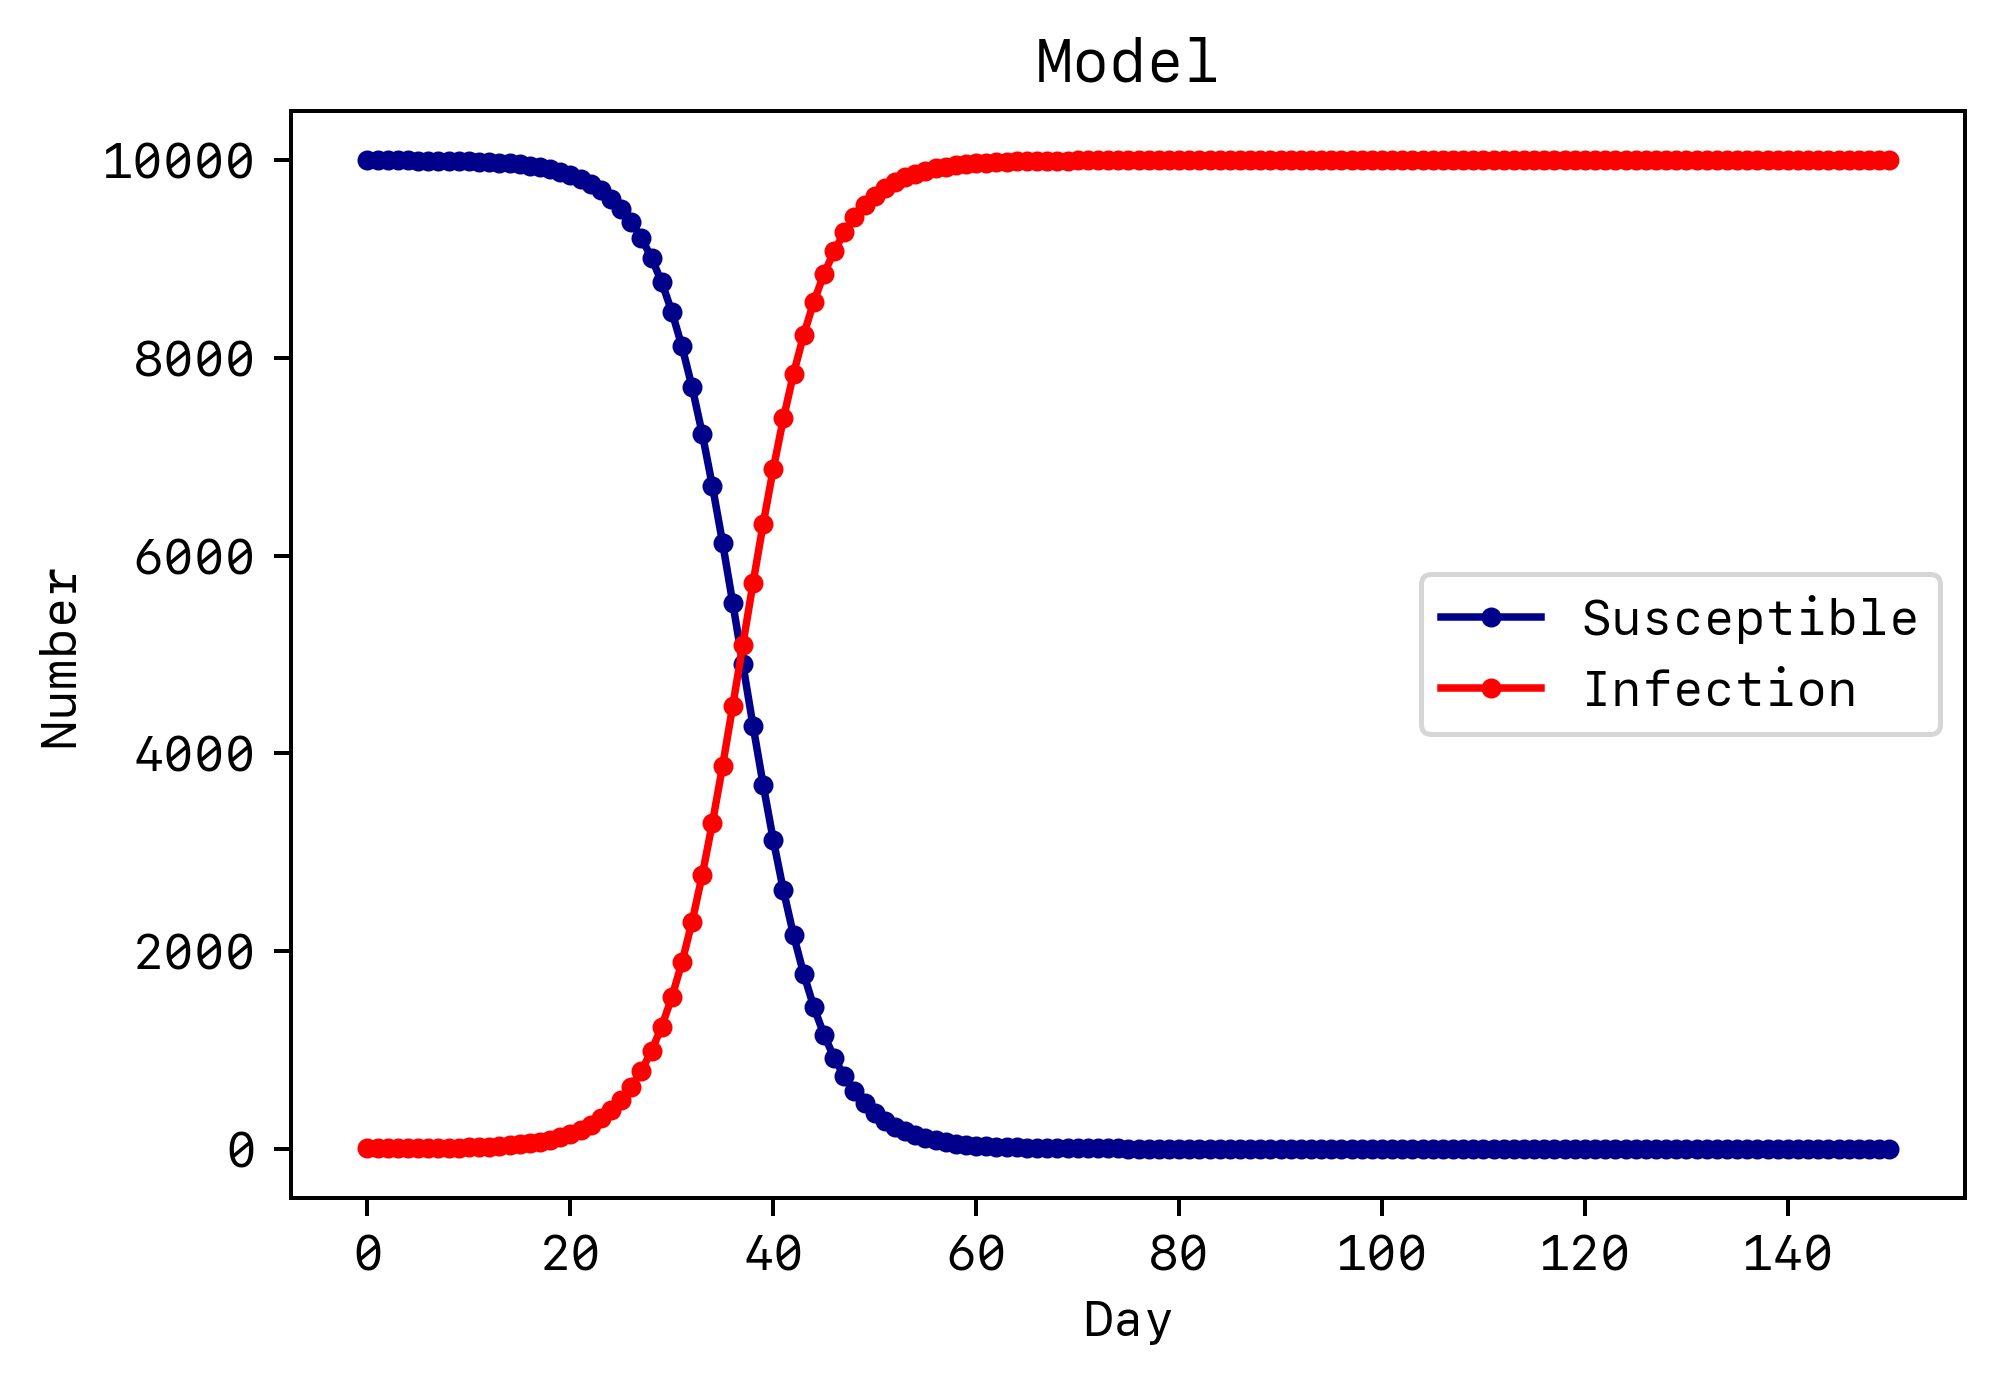

In [91]:
plot()


## SIS Model

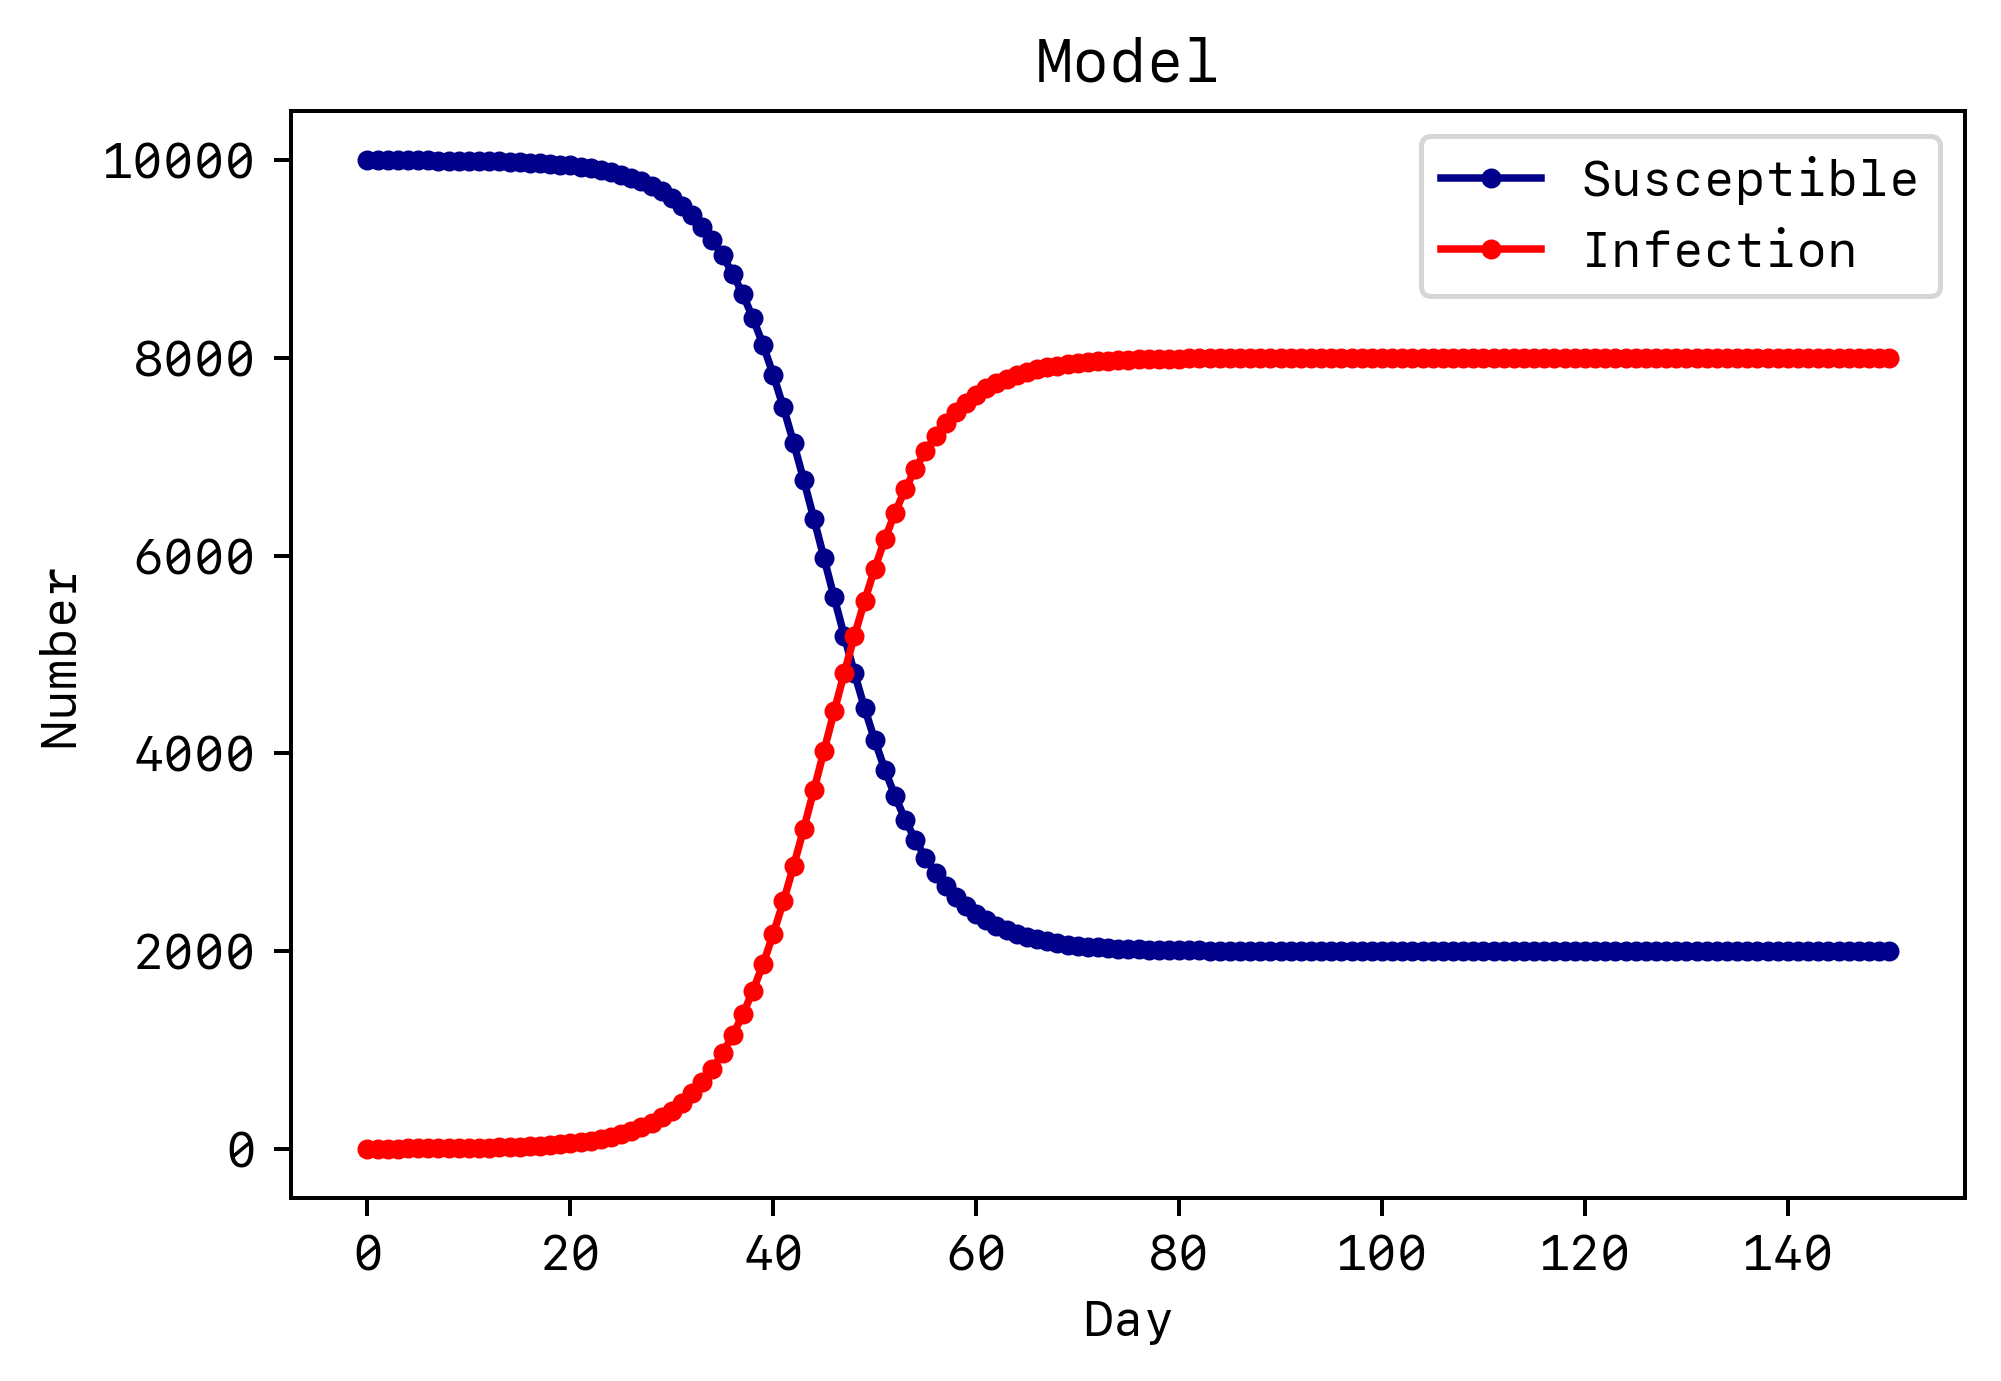

In [92]:
gamma = 0.05


def funcSI(inivalue, _):
    Y = np.zeros(2)
    X = inivalue
    Y[0] = -(beta * X[0]) / N * X[1] + gamma * X[1]  #易感个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]  #感染个体变化
    return Y


plot()

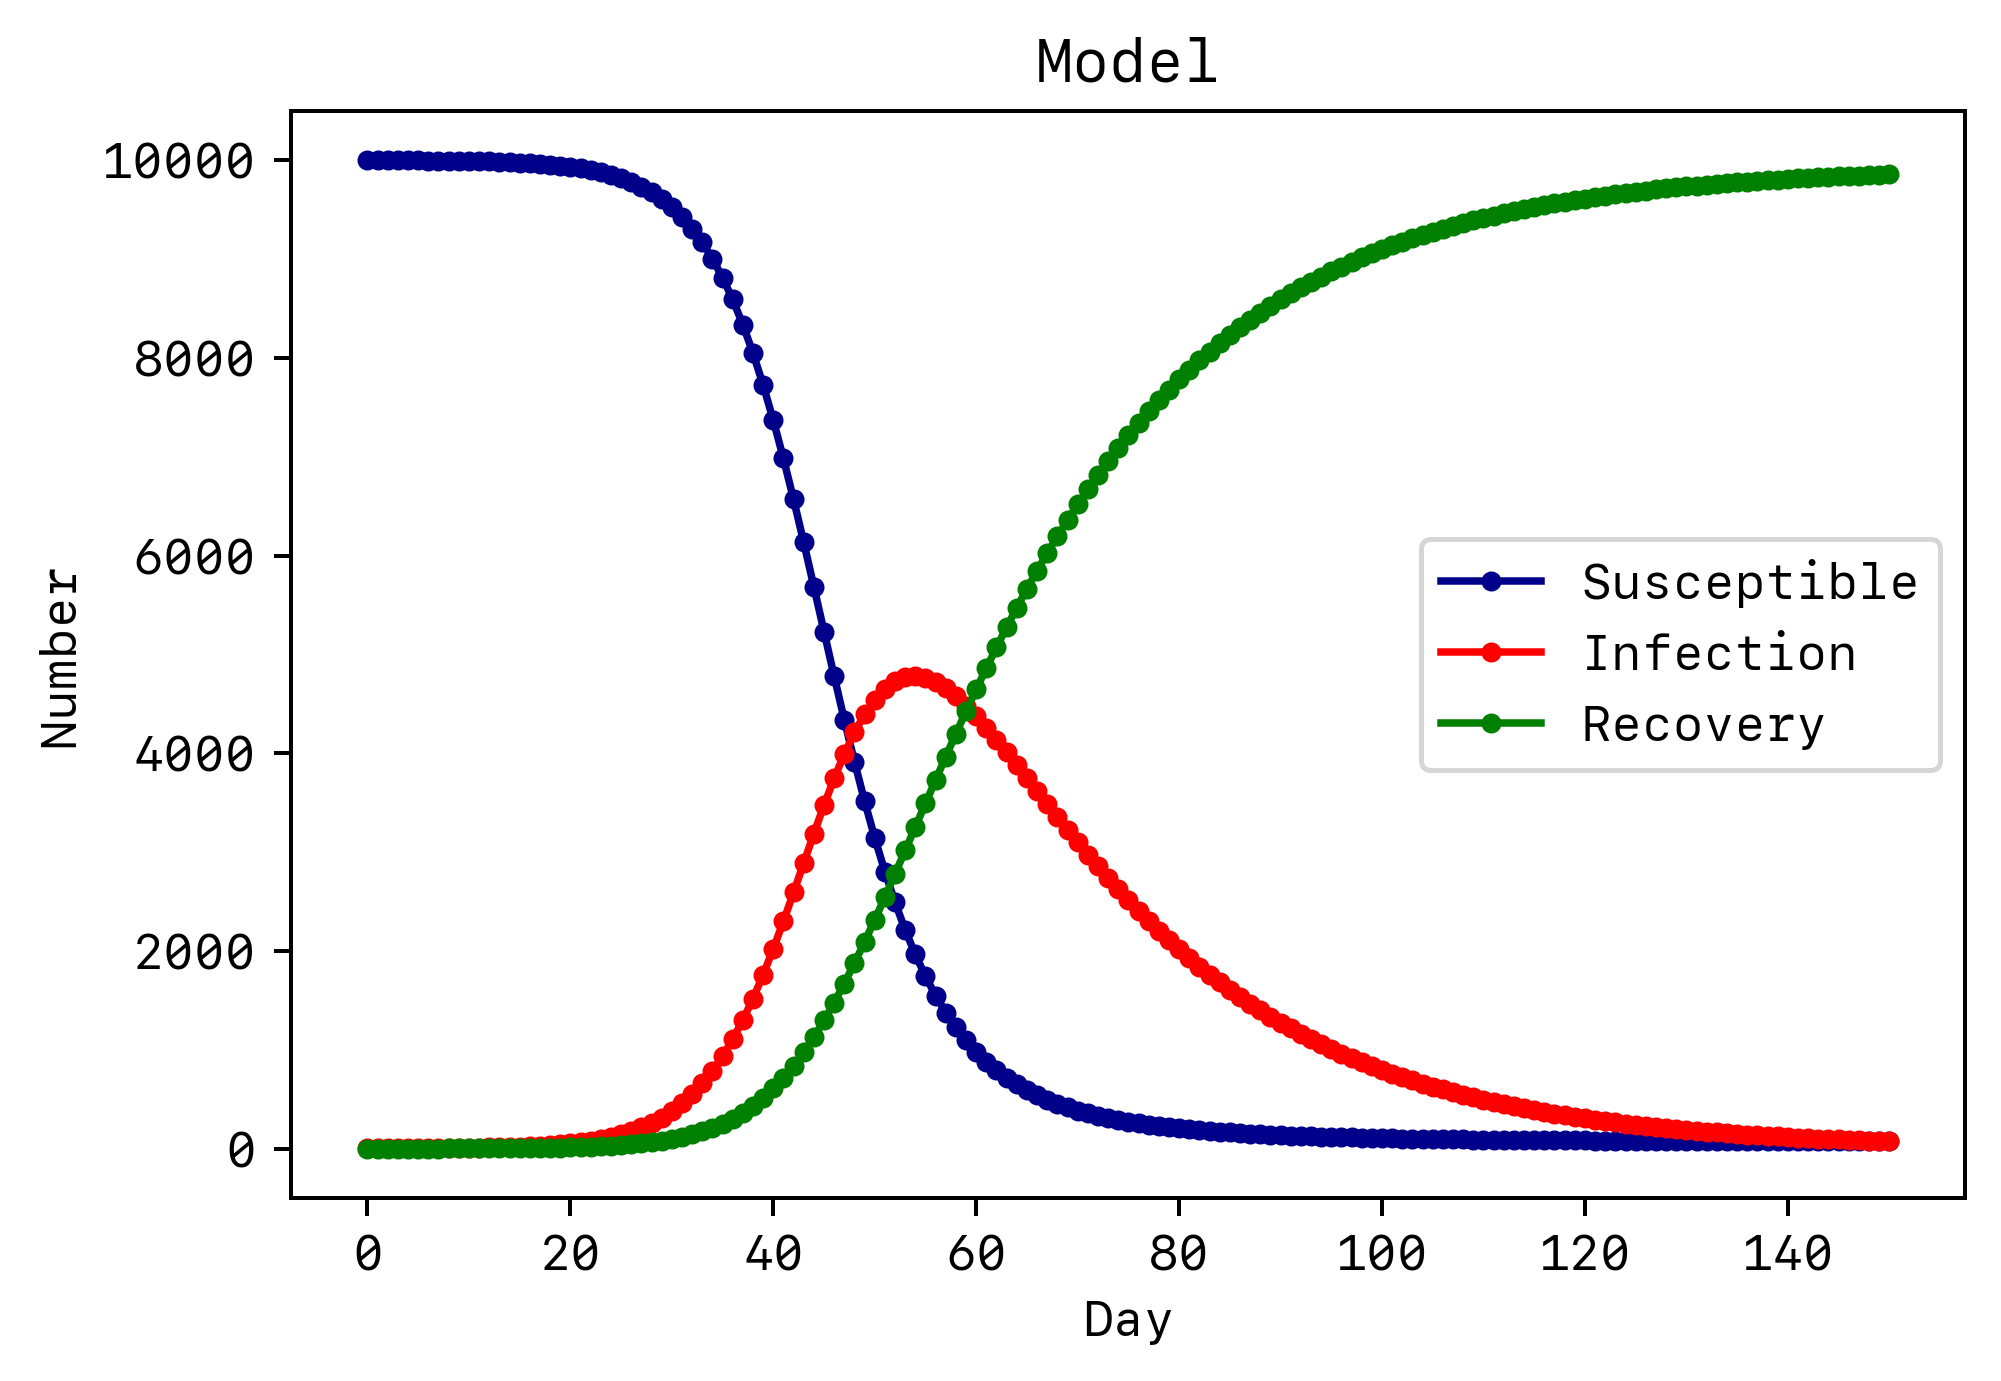

In [93]:
gamma = 0.05  # gamma为恢复率系数
I_0 = 1  # I_0为感染者的初始人数
R_0 = 0  # R_0为治愈者的初始人数
S_0 = N - I_0 - R_0  # S_0为易感染者的初始人数
INI = (S_0, I_0, R_0)  # INI为初始状态下的数组


def funcSI(inivalue, _):
    Y = np.zeros(3)
    X = inivalue
    Y[0] = -(beta * X[0] * X[1]) / N  #易感个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]  #感染个体变化
    Y[2] = gamma * X[1]
    return Y


def plot():
    T_range = np.arange(0, T + 1)
    RES = spi.odeint(funcSI, INI, T_range)
    plt.plot(RES[:, 0], color='darkblue', label='Susceptible', marker='.')
    plt.plot(RES[:, 1], color='red', label='Infection', marker='.')
    plt.plot(RES[:, 2], color='green', label='Recovery', marker='.')
    plt.title('Model')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Number')
    plt.show()


plot()

## SIRS Model

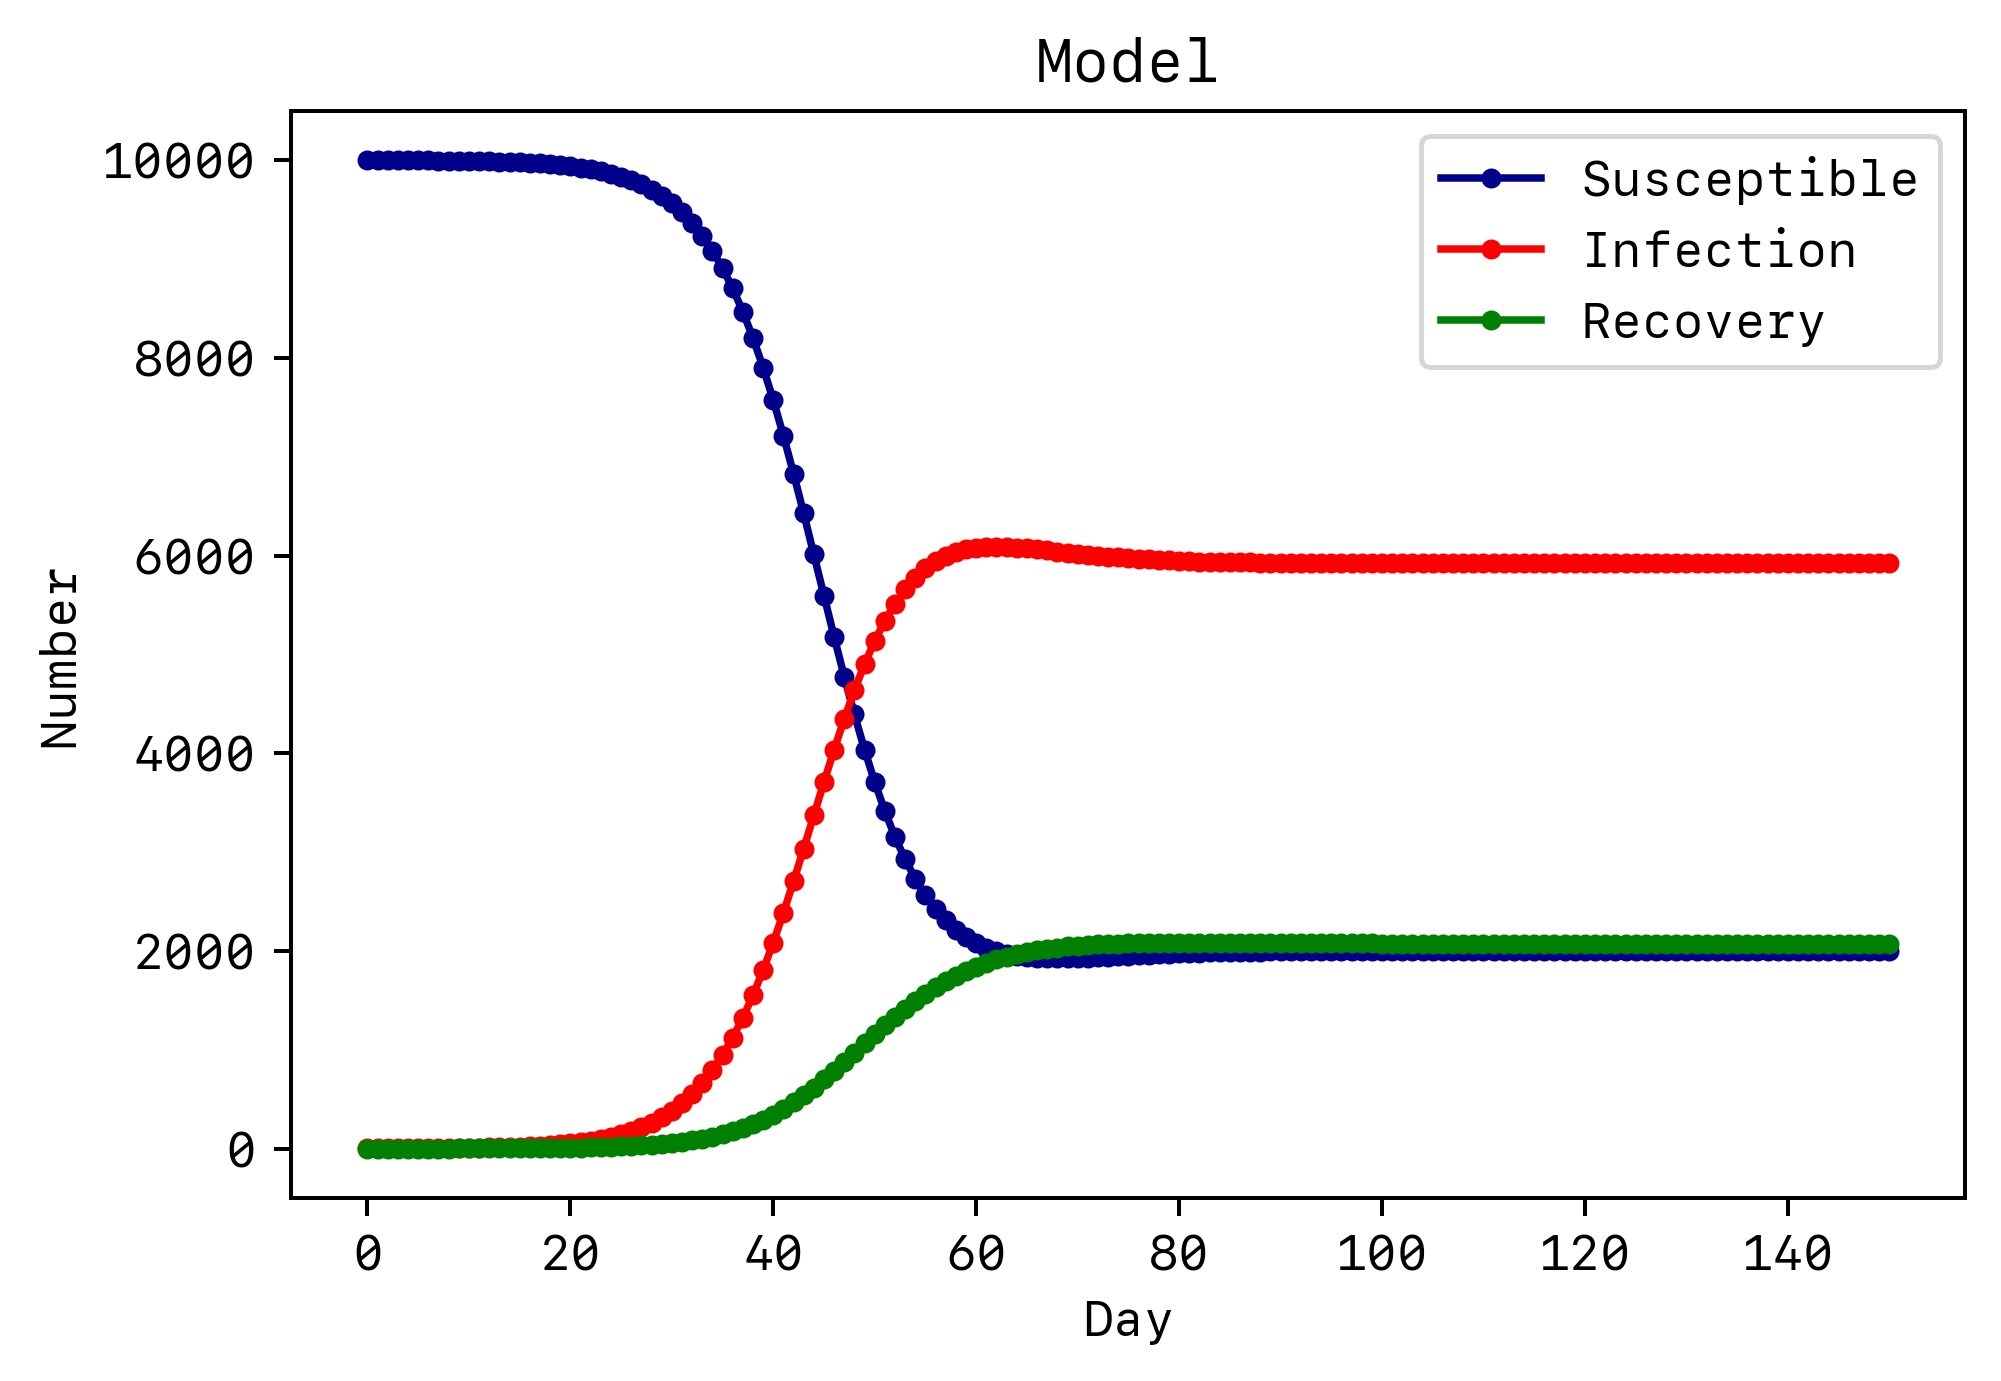

In [94]:
Ts = 7  # Ts为抗体持续时间


def funcSI(inivalue, _):
    Y = np.zeros(3)
    X = inivalue
    Y[0] = -(beta * X[0] * X[1]) / N + X[2] / Ts  #易感个体变化
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]  #感染个体变化
    Y[2] = gamma * X[1] - X[2] / Ts  #治愈个体变化
    return Y


plot()

## SIER Model


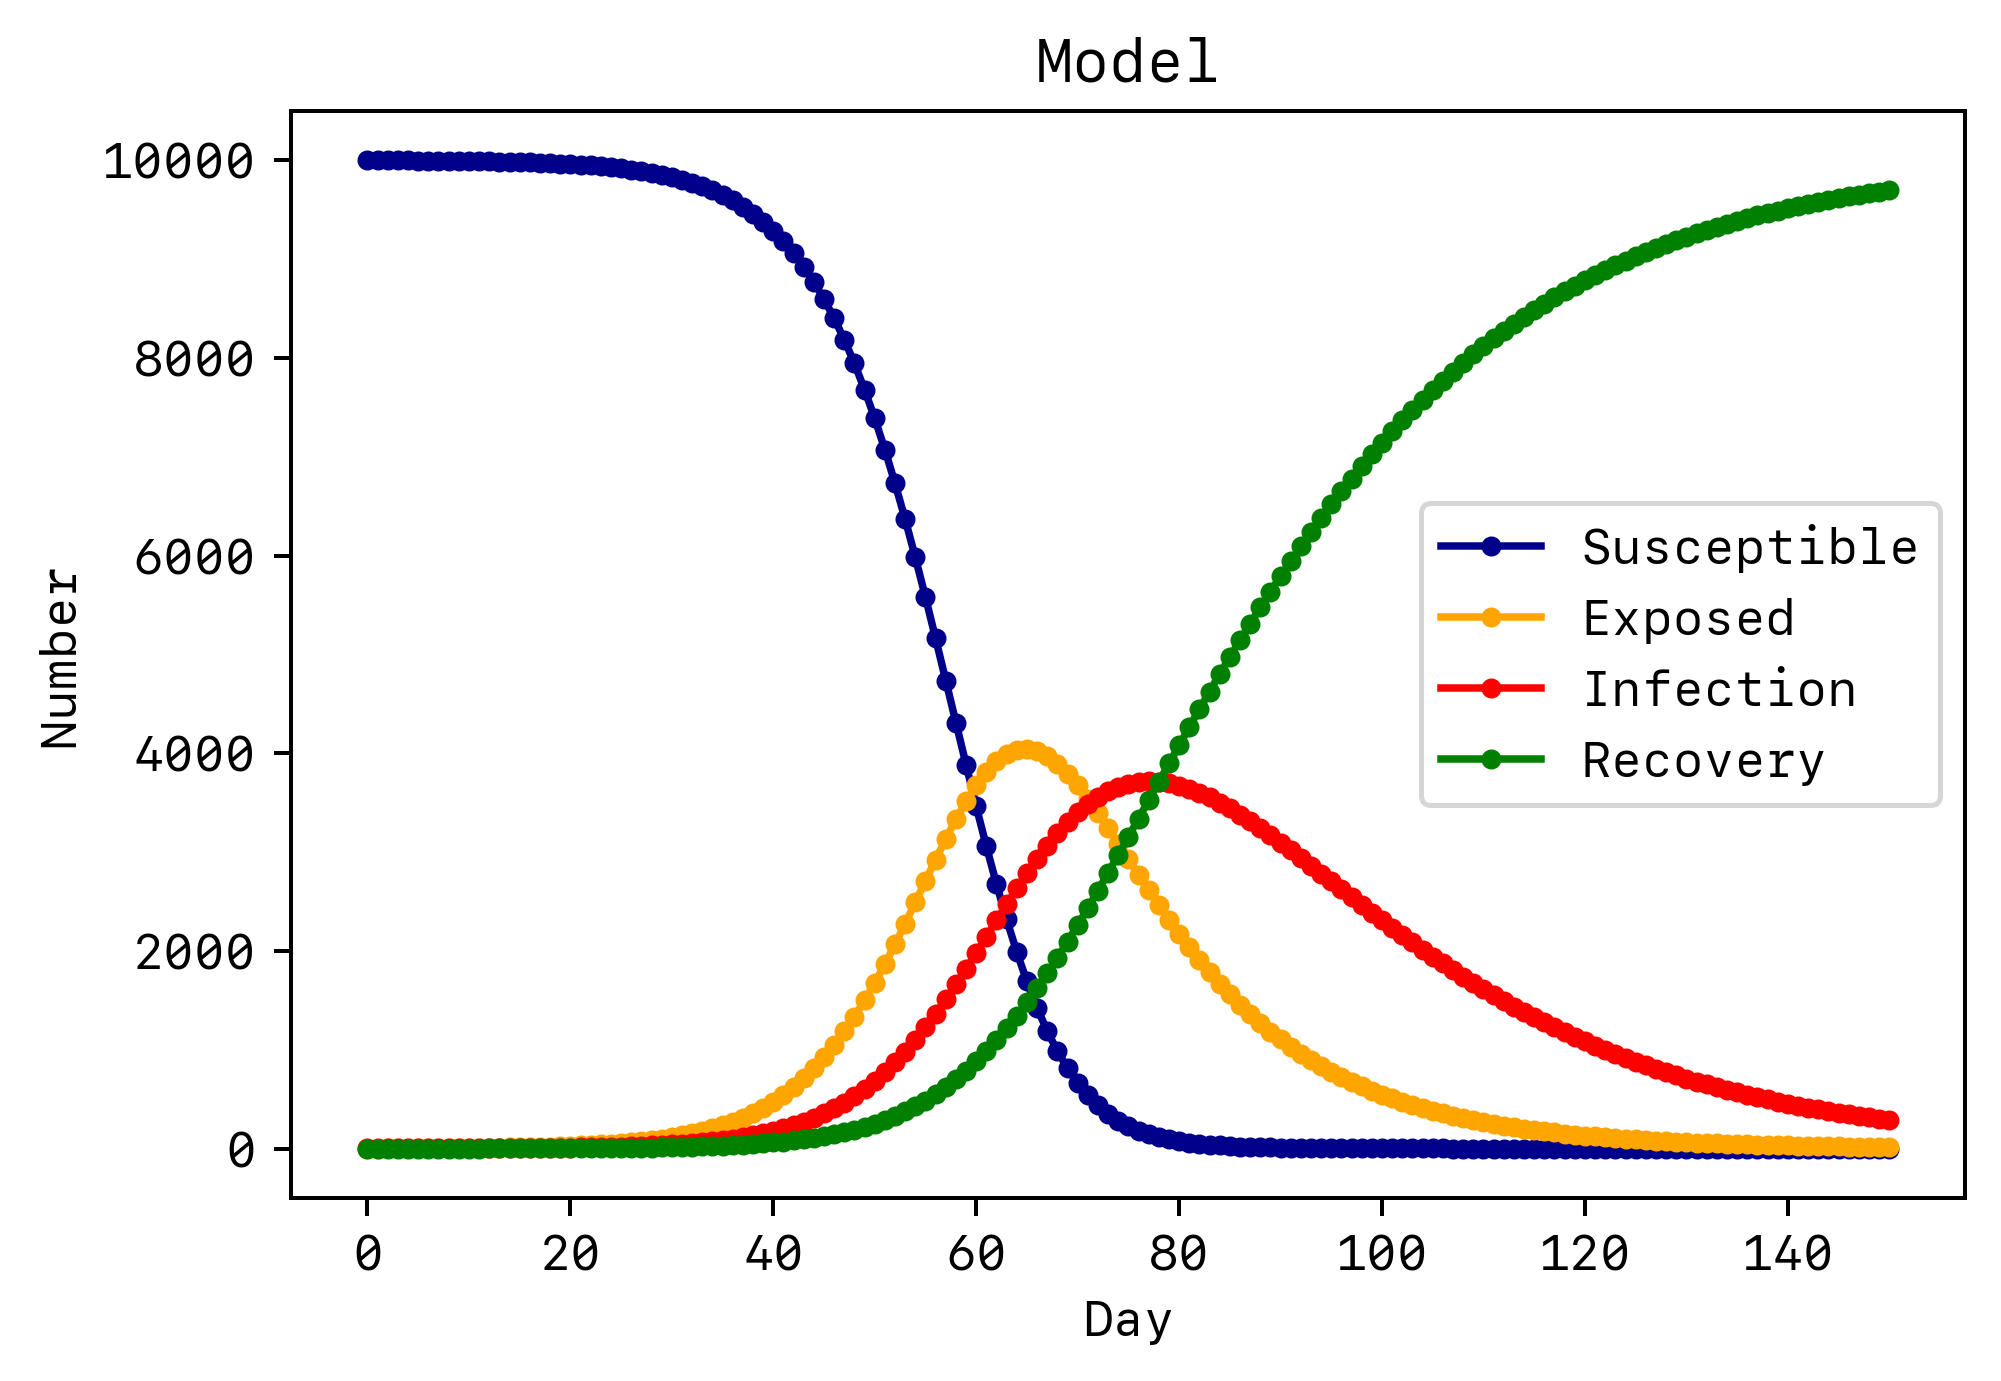

In [95]:
Te = 14  # Te为疾病潜伏期
E_0 = 0  # E_0为潜伏者的初始人数
beta = 0.6  # β为传染率系数
S_0 = N - I_0 - R_0 - E_0  # S_0为易感染者的初始人数
INI = (S_0, E_0, I_0, R_0)  # INI为初始状态下的数组


def funcSI(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    Y[0] = -(beta * X[0] * X[2]) / N  #易感个体变化
    Y[1] = (beta * X[0] * X[2] / N - X[1] / Te)  # 潜伏个体变化
    Y[2] = X[1] / Te - gamma * X[2]  #感染个体变化
    Y[3] = gamma * X[2]  #治愈个体变化
    return Y


def plot():
    T_range = np.arange(0, T + 1)
    RES = spi.odeint(funcSI, INI, T_range)
    plt.plot(RES[:, 0], color='darkblue', label='Susceptible', marker='.')
    plt.plot(RES[:, 1], color='orange', label='Exposed', marker='.')
    plt.plot(RES[:, 2], color='red', label='Infection', marker='.')
    plt.plot(RES[:, 3], color='green', label='Recovery', marker='.')
    plt.title('Model')
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Number')
    plt.show()


plot()

## SIERS Model

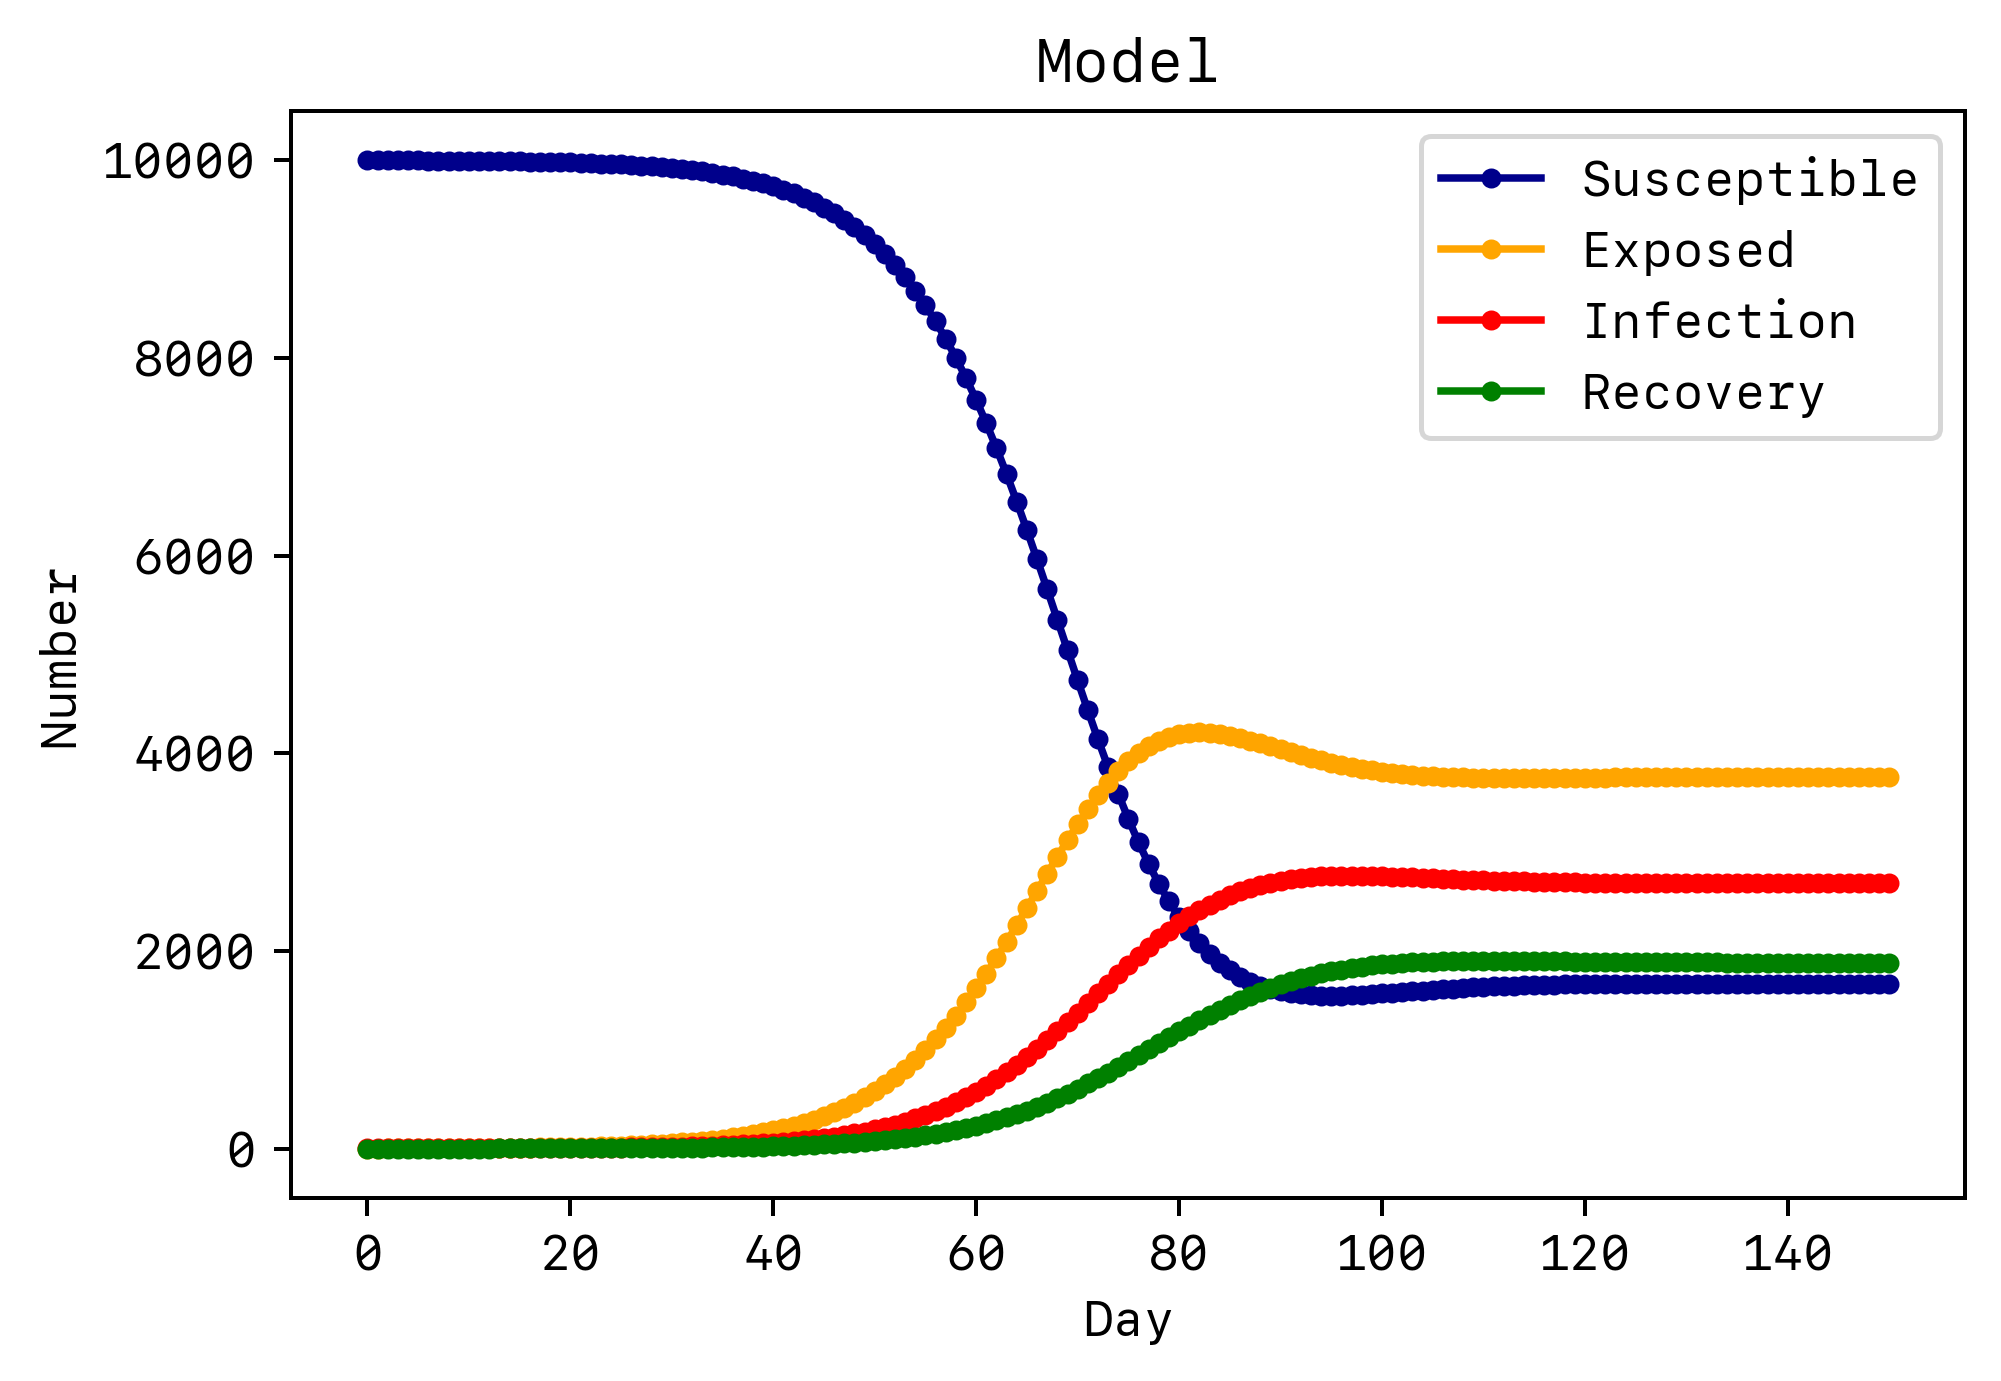

In [96]:
Ts = 7  # Ts为抗体持续时间
Te = 14  # Te为疾病潜伏期
beta = 0.6  # β为传染率系数
gamma = 0.1  # gamma为恢复率系数

def funcSI(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    Y[0] = -(beta * X[0] * X[2]) / N + X[3] / Ts  #易感个体变化
    Y[1] = (beta * X[0] * X[2] / N - X[1] / Te)  # 潜伏个体变化
    Y[2] = X[1] / Te - gamma * X[2]  #感染个体变化
    Y[3] = gamma * X[2] - X[3] / Ts  #治愈个体变化
    return Y


plot()